In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import os
from uncertainties import ufloat_fromstr
from uncertainties import unumpy as unp
from uncertainties import umath
from uncertainties.umath import *
import pandas as pd
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/Ramsauer Townsend/images')

plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30#--- plot parameters --- 
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30

In [2]:

import xlrd
 
loc = ('C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/Ramsauer Townsend/Y3_Ramsauer_Townsend_Raw.xlsx')
 
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(2)

sheet.cell_value(0, 0)
 
V_a = np.array(sheet.col_values(0)[6:])

# all values other than V_a are in mV so scale such that they're in V
V_s = np.array(sheet.col_values(1)[6:])*1e-3
V_se = np.array(sheet.col_values(2)[6:])*1e-3
V_p = np.array(sheet.col_values(3)[6:])*1e-3
V_pe = np.array(sheet.col_values(4)[6:])*1e-3
V_sF = np.array(sheet.col_values(7)[6:])*1e-3
V_sFe = np.array(sheet.col_values(8)[6:])*1e-3
V_pF = np.array(sheet.col_values(9)[6:])*1e-3
V_pFe = np.array(sheet.col_values(10)[6:])*1e-3
R_s = 100
R_se = 5
R_p = 10000
R_pe = 500



In [3]:
# I = V/R
R_s = 100; R_p = 10000

I_s = V_s/R_s
I_p = V_p/R_p
I_sF = V_sF/R_s
I_pF = V_pF/R_p


In [4]:
Ies = unp.std_devs(unp.uarray(V_s,V_se) /R_s)
Iep = unp.std_devs(unp.uarray(V_p,V_pe) /R_p)
IesF = unp.std_devs(unp.uarray(V_sF,V_sFe) /R_s)
IepF = unp.std_devs(unp.uarray(V_pF,V_pFe) /R_p)
mome = unp.std_devs(V_a-(unp.uarray(V_s,V_se))**(1/2))

In [5]:

def emom(va,vs):
    return np.sqrt(va - vs)
mom = (emom(V_a,V_s))

def prob(p, s,sf,pf):
    
    return 1 - (p*sf)/(s*pf)
print(Iep)

[1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08 1.e-08
 1.e-08 1.e-08 1.e-07 1.e-07 1.e-07 1.e-06 1.e-06]


<ipython-input-5-ea0601bf61ed>:2: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(va - vs)


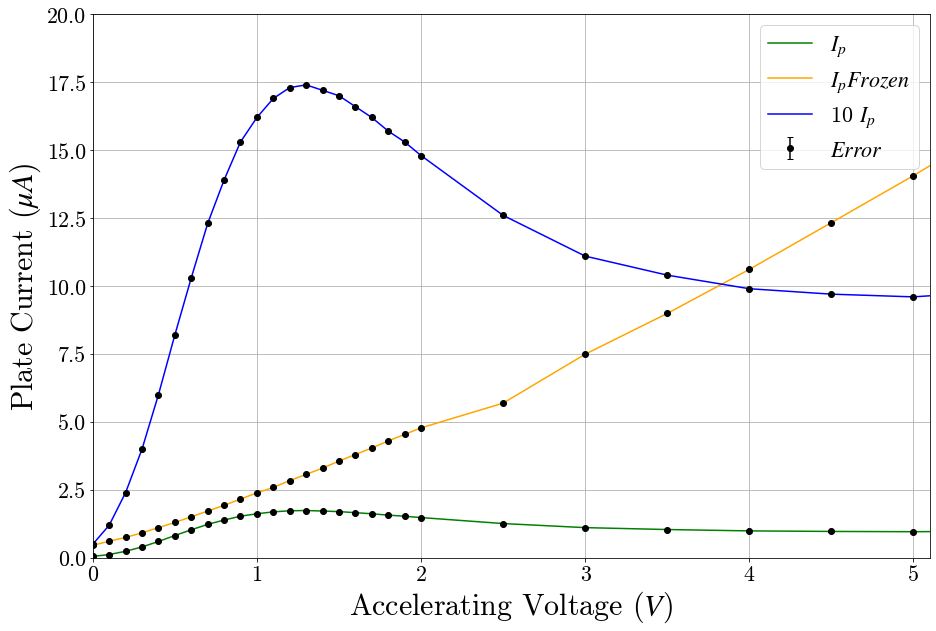

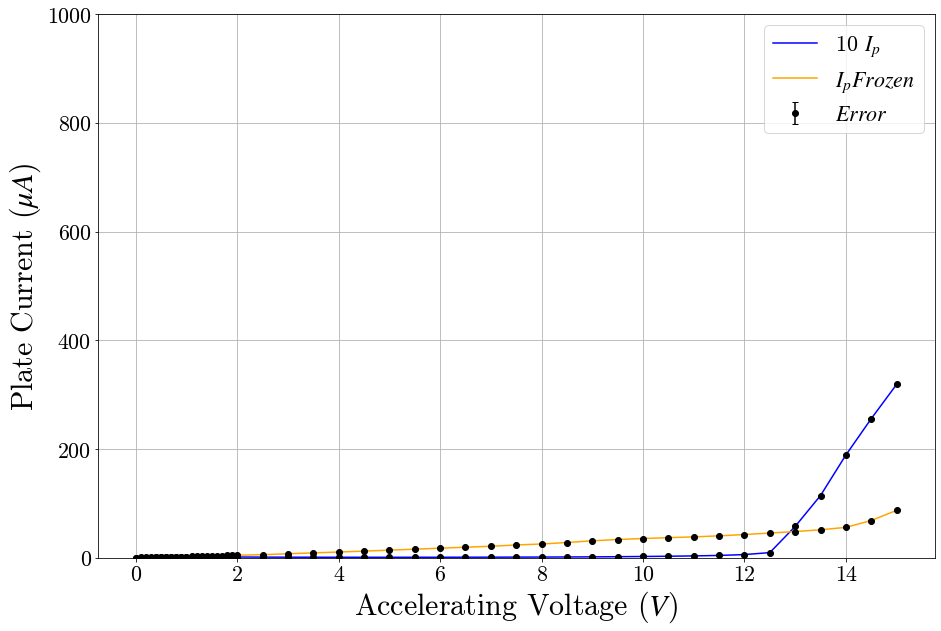

In [6]:
plt.plot(V_a,I_p*1e+6,color = 'g', label = "$I_p$")
plt.plot(V_a,I_pF*1e+6, color = 'orange',label = "$I_p Frozen$")
plt.plot(V_a,10*I_p*1e+6, color = 'b',label = "10 $I_p$")
plt.errorbar(V_a,10*I_p*1e+6, yerr = Iep*1e+6, fmt = 'o',capsize = 3,color = 'k',label = "$Error$")
plt.errorbar(V_a,I_pF*1e+6, yerr = IepF*1e+6, fmt = 'o',capsize = 3,color = 'k')


plt.errorbar(V_a,I_p*1e+6, yerr = Iep*1e+6,fmt = 'o',capsize = 3,color = 'k')

plt.xlabel("Accelerating Voltage ($V$)")
plt.ylabel("Plate Current ($\mu A$)")


plt.grid(True)
plt.xlim(0,5.1)
plt.ylim(0,20)
plt.legend()

plt.savefig('platecurrentszoom.png',bbox_inches='tight', dpi = 300)
plt.show()

plt.plot(V_a,I_p*1e+6, color = 'b',label = "10 $I_p$")
plt.plot(V_a,I_pF*1e+6, color = 'orange',label = "$I_p Frozen$")
plt.errorbar(V_a,I_p*1e+6, yerr = Iep*1e+6,fmt = 'o',capsize = 3,color = 'k',label = "$Error$")
plt.errorbar(V_a,I_pF*1e+6, yerr = IepF*1e+6,fmt = 'o',capsize = 3,color = 'k')

plt.xlabel("Accelerating Voltage ($V$)")
plt.ylabel("Plate Current ($\mu A$)")
plt.ylim(0,1000)

plt.grid(True)

plt.legend()

plt.savefig('platecurrents.png',bbox_inches='tight', dpi = 300)
plt.show()


In [10]:
iS = unp.uarray(V_s,V_se) /R_s
ip = unp.uarray(V_p,V_pe) /R_p
isf = unp.uarray(V_sF,V_sFe) /R_s
ipf = unp.uarray(V_pF,V_sFe) /R_p


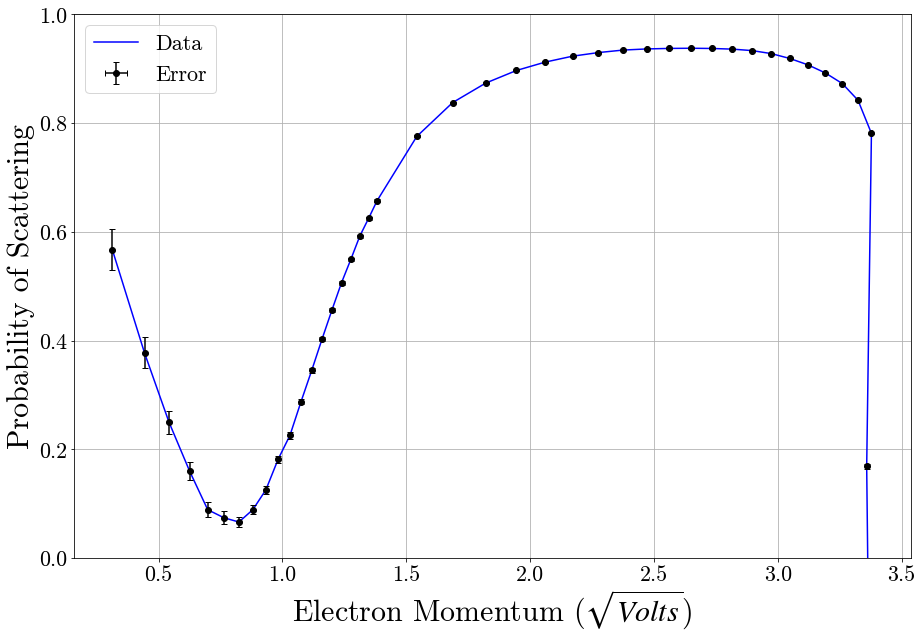

0.8242572413997951 3.483665071458088e-05
0.06618311131180854
0.040973918166649526


In [11]:
pe = unp.std_devs(prob(ip,iS,isf,ipf))
p = prob(I_p,I_s,I_sF,I_pF)
plt.plot(mom,p, color = 'b',label = 'Data')
plt.errorbar(mom,p,yerr = pe, xerr = mome,fmt = 'o', capsize = 3,color = 'k',label = 'Error')
plt.grid(True)

plt.xlabel("Electron Momentum ($\sqrt{Volts}}$)")
plt.ylabel("Probability of Scattering")
plt.ylim(0,1)

plt.legend(loc = 'upper left')
plt.savefig('probability.png',bbox_inches='tight', dpi = 300)
plt.show()

#find the min x value (should be within the first 10 points from the graph)
mi11 = (min(p[:10]))
#getting the index of this value
pr11 = list(p)
i11= (pr11.index(mi11))
#getting corresponding x val by using index number found
print(mom[i11],mome[i11])
print(p[i11])

p1 = (p[5] - p[6])
p2 = p[6]-p[7]
p3 = np.abs(p[7] - p[8])
p4  = np.abs(p[8] - p[9])
print(np.mean(p1+p2+p3+p4)/2)

In [12]:
def mfp(p):
    return -0.7/np.log(1-p)
t = prob(ip,iS,isf,ipf)
pet = 1/(-0.7/unp.log(1-t))
pe = unp.std_devs(pe)

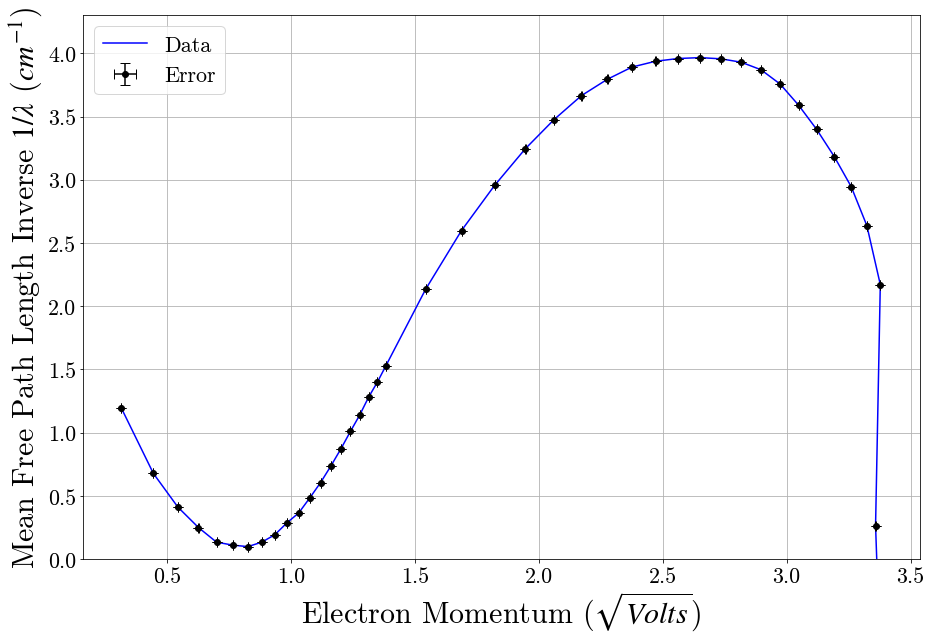

0.8242572413997951 3.483665071458088e-05


In [13]:
plt.plot(mom,1/mfp(p),color = 'b',label = 'Data')
plt.errorbar(mom,1/mfp(p),yerr = (pe), xerr = mome,fmt = 'o',capsize = 5, color = 'k',label = 'Error')
plt.grid(True)

plt.xlabel("Electron Momentum ($\sqrt{Volts}}$)")
plt.ylabel("Mean Free Path Length Inverse $1/\lambda$ ($cm^{-1}$)")
plt.legend(loc = 'upper left')
plt.ylim(0,4.3)
plt.savefig('mfp.png',bbox_inches='tight', dpi = 300)


plt.show()

#find the min x value (should be within the first 10 points from the graph)
mi22 = (min(1/mfp(p)[0:10]))
#getting the index of this value
pr22 = list(1/mfp(p))
i22 = (pr22.index(mi22))
#getting corresponding x val by using index number found
print(mom[i22],mome[i22])

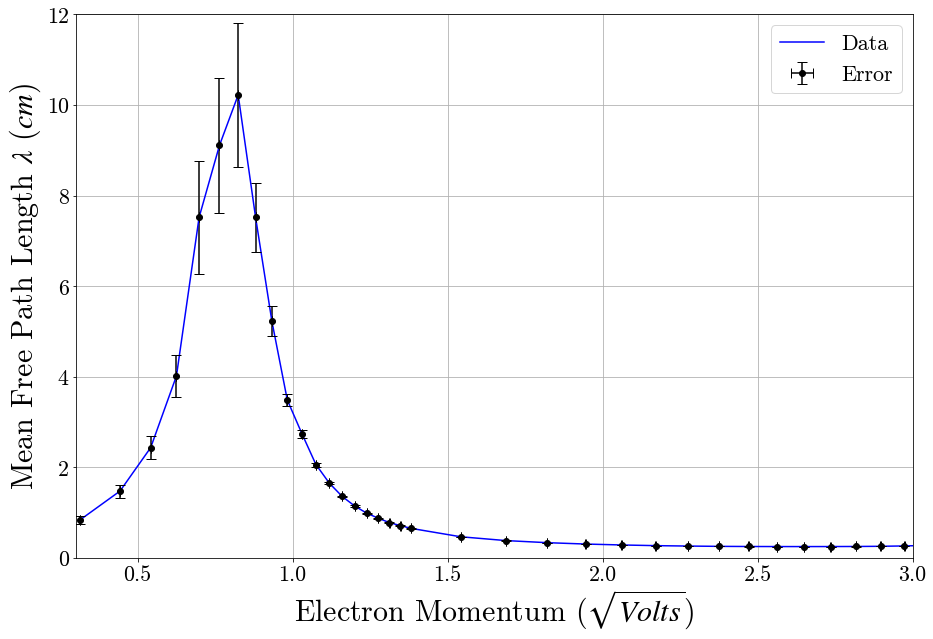

In [14]:
pen = unp.std_devs((-0.7/unp.log(1-t)))
plt.plot(mom,mfp(p),color = 'b',label = 'Data')
plt.errorbar(mom,mfp(p),yerr = pen, xerr = mome,fmt = 'o',capsize = 5, color = 'k',label = 'Error')
plt.grid(True)

plt.xlabel("Electron Momentum ($\sqrt{Volts}}$)")
plt.ylabel("Mean Free Path Length $\lambda$ ($cm$)")
plt.xlim(0.3,3)
plt.ylim(0,12)
plt.legend(loc='upper right')
plt.savefig('mfp2.png',bbox_inches='tight', dpi = 300)
plt.show()


In [15]:
#elastic collsion prob

def pec(p,s,pf,sf):
    return -((10**(-3))/0.007)*np.log(p*sf/(s*pf))

Pc = -((10**(-3))/0.007)*unp.log(ip*isf/(ipf*iS))


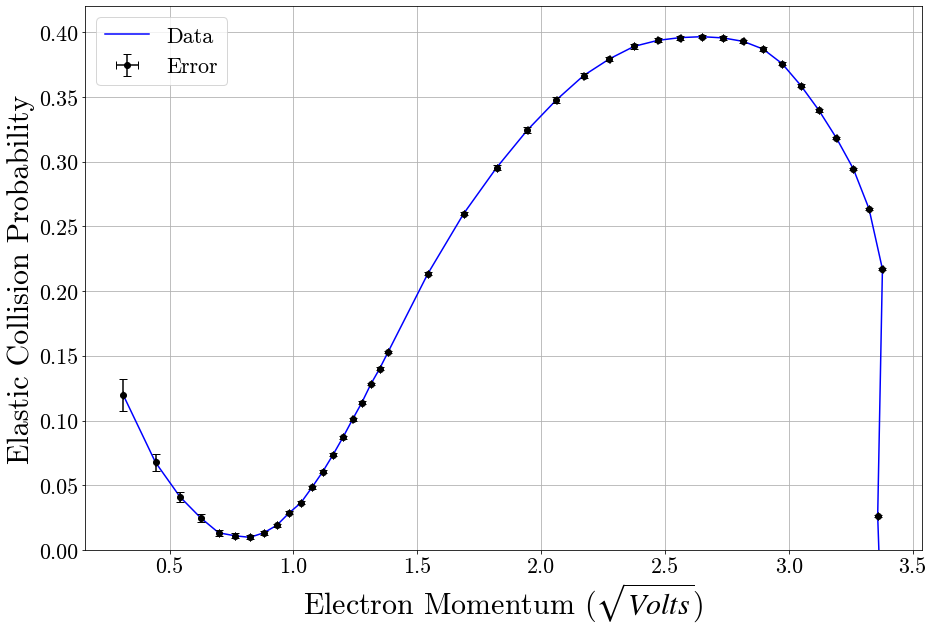

0.8242572413997951 3.483665071458088e-05


In [16]:
pece = unp.std_devs(Pc)
plt.plot(mom,pec(I_p,I_s,I_pF,I_sF), color = 'blue',label = 'Data')
plt.errorbar(mom,pec(I_p,I_s,I_pF,I_sF),yerr = pece, xerr =mome,fmt = 'o',capsize = 4, color = 'k',label = 'Error')
plt.grid(True)
plt.ylim(0,0.42)
plt.xlabel("Electron Momentum ($\sqrt{Volts}}$)")
plt.ylabel("Elastic Collision Probability")
plt.legend(loc = 'upper left')

plt.savefig('pec.png',bbox_inches='tight', dpi = 300)
plt.show()

#find the min x value (should be within the first 10 points from the graph)
mi33= (min(pec(I_p,I_s,I_pF,I_sF)[0:10]))
#getting the index of this value
pr33 = list(pec(I_p,I_s,I_pF,I_sF))
i33 = (pr33.index(mi33))
#getting corresponding x val by using index number found
print(mom[i33],mome[i33])

In [17]:
 
wb = xlrd.open_workbook(loc)
sheet = wb.sheet_by_index(3)

sheet.cell_value(0, 0)
 
V_ABS = np.array(sheet.col_values(0)[6:])

V_aR = np.array(sheet.col_values(1)[6:])
V_sR = np.array(sheet.col_values(2)[6:])*1e-3
V_sRe = np.array(sheet.col_values(3)[6:])*1e-3
V_pR = np.array(sheet.col_values(4)[6:])*1e-3
V_pRe = np.array(sheet.col_values(5)[6:])*1e-3

R_sR = 100
R_sRe = 5
R_pR = 10000
R_pRe = 500


I_sR = V_sR/R_sR
I_pR = V_pR/R_pR

IRes = (unp.uarray(V_sR,V_sRe)) /unp.std_devs(unp.uarray(R_sR,R_sRe))
IRep =(unp.uarray(V_pR,V_pRe) )/unp.std_devs(unp.uarray(R_pR,R_pRe))
print(unp.std_devs(unp.log(IRes[:39])))


[0.02173913 0.02272727 0.02380952 0.02631579 0.02777778 0.02941176
 0.03125    0.03571429 0.03846154 0.04166667 0.04545455 0.05
 0.05263158 0.05555556 0.0625     0.0625     0.07142857 0.08333333
 0.08333333 0.1        0.11111111 0.125      0.125      0.14285714
 0.16666667 0.2        0.2        0.25       0.25       0.33333333
 0.33333333 0.5        0.5        0.5        0.5        0.5
 1.         1.         1.        ]


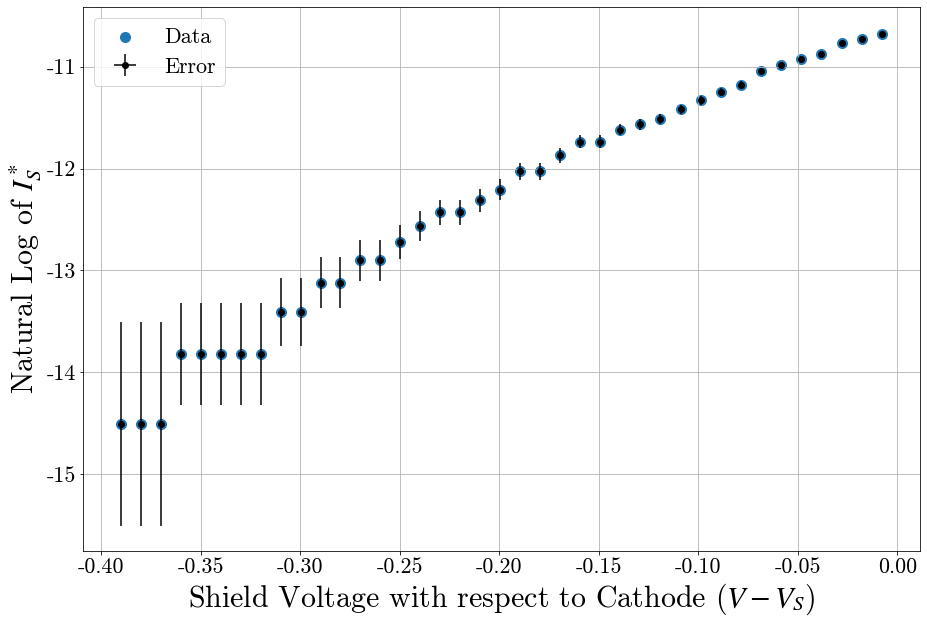

In [18]:
plt.scatter(-(V_ABS - V_sR )[:39],np.log(I_sR[:39]), s = 100,label = 'Data')
plt.errorbar(-(V_ABS - V_sR )[:39],np.log(I_sR[:39]),yerr = unp.std_devs(unp.log(IRes[:39])), xerr = V_sRe[:39],fmt = 'o', color = 'k',label = 'Error')
plt.ylabel('Natural Log of $I_S^*$')
plt.xlabel('Shield Voltage with respect to Cathode ($V-V_S$)')
plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig('correctiono.png',bbox_inches='tight', dpi = 300)
plt.show()


In [19]:
def chi(exp, pred, error):
    return np.sum(((exp - pred)/(error))**2)


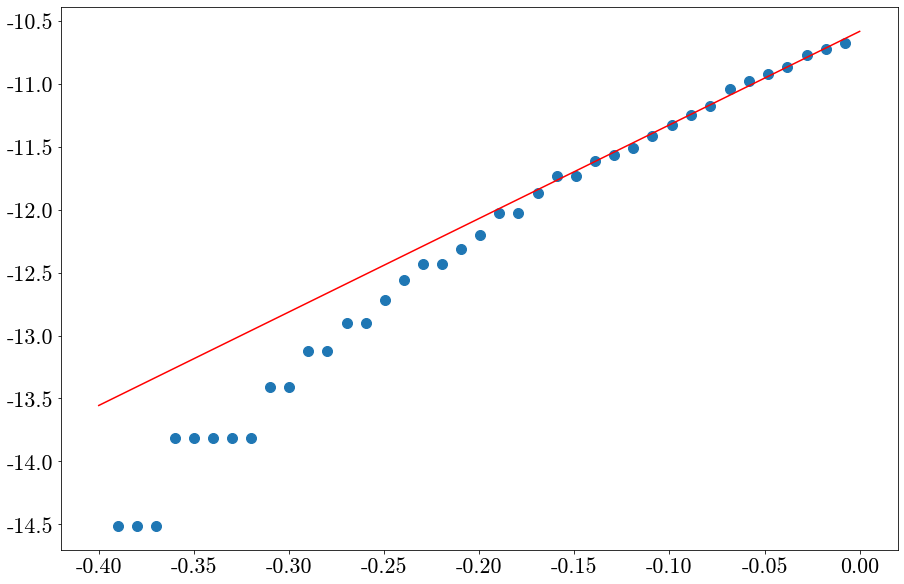

In [20]:
def func(x,m,c):
        return m*x+c
    
x = (-(V_ABS - V_sR ))[:39]
yd = np.log(I_sR[:39])
ey = unp.std_devs(unp.log(IRes[:39]))
popt, pcov = curve_fit(func, x[:15],np.log(I_sR[:15]), p0 = [2,-10], sigma = unp.std_devs(unp.log(IRes[:15])), absolute_sigma=True)

m = popt[0]
c = popt[1]
xr = np.linspace(-0.4,0,100)
yfit=func(xr,*popt)


#plot theory
plt.plot(xr,yfit, 'r', label = 'best fit line')
plt.scatter(x[:39],np.log(I_sR[:39]), s = 100,label = 'Data')


In [21]:
# taking out the 0 V readings as error will occur when getting the log
xdata =  -(V_ABS - V_sR )[:39]
ydata = (I_sR[:39])
y_err = unp.std_devs(unp.log(IRes[:39]))





In [22]:
def c(xdat,ydat,er):
    result = []
    chisum = []
    i= 3
    p1 = []
    p2 = []
    cov1 = []
    cov2 = []
   
    # i =2 is chosen since 2 points are needed to get the curve fit paraeters.
    #the upper line starts with 2 points and the lower starts with the rest
    #as the loop goes on the upper lines gains more points while the number of 
    #points in the lower decreases and chi square vals are fount for each combination 
    
    while i < len(xdat)-3:
       
        x1 = xdat[:len(xdat)-i]
        x2 = xdat[len(xdat):len(xdat)-i:-1]
        y1 = (np.log(ydat[:len(ydat)-i]))
        y2 = (np.log(ydat[len(xdat):len(xdat)-i:-1]))
    
        ery1 = er[:len(xdat)-i]
        ery2 = er[len(xdat):len(xdat)-i:-1]
        
        popt1, pcov1 = curve_fit(func, x1, y1)#upper line
        popt2, pcov2 = curve_fit(func, x2, y2)#lower line
        p1.append(popt1)
        p2.append(popt2)
        cov1.append(pcov1)
        cov2.append(pcov2)
        
        chi1 = chi(y1,func(x1,*popt1),ery1)
        chi2 = chi(y2,func(x2,*popt2),ery2)
        
        if chi1 + chi2 > 0:
            chisum.append(chi1 +chi2) 
            i += 1
       
    ind = (chisum.index(min(chisum)))
    return p1[ind],p2[ind],cov1[ind],cov2[ind]
e =  unp.std_devs(unp.log(IRes[:39]))
fit = c(x[:39], I_sR[:39], e[:39])
print(fit)

er_m1 = np.sqrt(fit[2][0,0])
er_m2 = np.sqrt(fit[3][0,0])
er_c1 = np.sqrt(fit[2][1,1])
er_c2 = np.sqrt(fit[3][1,1])


print(I_sR)

(array([  7.56333357, -10.57747253]), array([12.42179259, -9.64560225]), array([[0.01868757, 0.00165577],
       [0.00165577, 0.00019249]]), array([[0.21640697, 0.06270804],
       [0.06270804, 0.01896835]]))
[2.3e-05 2.2e-05 2.1e-05 1.9e-05 1.8e-05 1.7e-05 1.6e-05 1.4e-05 1.3e-05
 1.2e-05 1.1e-05 1.0e-05 9.5e-06 9.0e-06 8.0e-06 8.0e-06 7.0e-06 6.0e-06
 6.0e-06 5.0e-06 4.5e-06 4.0e-06 4.0e-06 3.5e-06 3.0e-06 2.5e-06 2.5e-06
 2.0e-06 2.0e-06 1.5e-06 1.5e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06 1.0e-06
 5.0e-07 5.0e-07 5.0e-07 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00]


C:\Users\laura\anaconda3\lib\site-packages\scipy\optimize\minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [23]:
def c2(xdat,ydat,er):
    result = []
    chisum = []
    i= 3
    p1 = []
    p2 = []
    cov1 = []
    cov2 = []
   
    # i =2 is chosen since 2 points are needed to get the curve fit paraeters.
    #the upper line starts with 2 points and the lower starts with the rest
    #as the loop goes on the upper lines gains more points while the number of 
    #points in the lower decreases and chi square vals are fount for each combination 
    
    while i < len(xdat)-3:
       
        x1 = xdat[:len(xdat)-i]
        x2 = xdat[len(xdat):len(xdat)-i:-1]
        y1 = (np.log(ydat[:len(ydat)-i]))
        y2 = (np.log(ydat[len(xdat):len(xdat)-i:-1]))
    
        ery1 = er[:len(xdat)-i]
        ery2 = er[len(xdat):len(xdat)-i:-1]
        
        popt1, pcov1 = curve_fit(func, x1, y1)#upper line
        popt2, pcov2 = curve_fit(func, x2, y2)#lower line
        p1.append(popt1)
        p2.append(popt2)
        cov1.append(pcov1)
        cov2.append(pcov2)
        
        chi1 = chi(y1,func(x1,*popt1),ery1)
        chi2 = chi(y2,func(x2,*popt2),ery2)
        
        if chi1 + chi2 > 0:
            chisum.append(chi1 +chi2) 
            i += 1
       
    ind = (chisum.index(min(chisum)))
    return p1,p2,chisum




In [24]:
def dup(dat):
    newdat = []
    index = []
    for i in range(0,len(dat)):
        if dat[i] in newdat:
            index.append(i)
        else:
            newdat.append(dat[i])
    
    return newdat,index


In [29]:

yd, ind = dup((ydata))
xd = np.delete(xdata,ind)
print(x)

xd = np.array([-0.0077,  -0.0178,  -0.0279,  -0.0381,  -0.0482,  -0.0583,  -0.0684,  -0.0786,
 -0.0887,  -0.0988,  -0.1089,  -0.119,   -0.12905, -0.1391,  -0.1492,  -0.1693,
 -0.1794,  -0.1995,  -0.20955, -0.2196,  -0.23965, -0.2497,  -0.25975, -0.2798,
 -0.29985, -0.3399,  -0.38995])
xe = np.full(int(len(xd)),(V_sRe[0]))
ye = np.delete(y_err,ind)

fits = c(xd, yd, ye)
fit1 = fits[0]
fit2 = fits[1]
print(fit1)
print(fit2)
print(xd)
print(x)     
d = c2(xd, yd, xe)

m1= []
c1 = []
for i in d[0]:
    m = i[0]
    m1.append(m)
    c = i[1]
    c1.append(c)
    
m2= []
c2 = []
for i in d[1]:
    m = i[0]
    m2.append(m)
    c = i[1]
    c2.append(c)


Output = [m1, c1,m2,c2,d[2]]

os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/Ramsauer Townsend')
dataset = pd.DataFrame({'Upper Line Slope': Output[0], 'Upper Line Intercept': Output[1], 'Lower Line Slope': Output[2],
                   'Lower Line Intercept': Output[3],  'Sum of Chisquares': Output[4]})

dataset.to_csv('chidat.csv')



[-0.0077  -0.0178  -0.0279  -0.0381  -0.0482  -0.0583  -0.0684  -0.0786
 -0.0887  -0.0988  -0.1089  -0.119   -0.12905 -0.1391  -0.1492  -0.1592
 -0.1693  -0.1794  -0.1894  -0.1995  -0.20955 -0.2196  -0.2296  -0.23965
 -0.2497  -0.25975 -0.26975 -0.2798  -0.2898  -0.29985 -0.30985 -0.3199
 -0.3299  -0.3399  -0.3499  -0.3599  -0.36995 -0.37995 -0.38995]


TypeError: 'numpy.float64' object is not callable

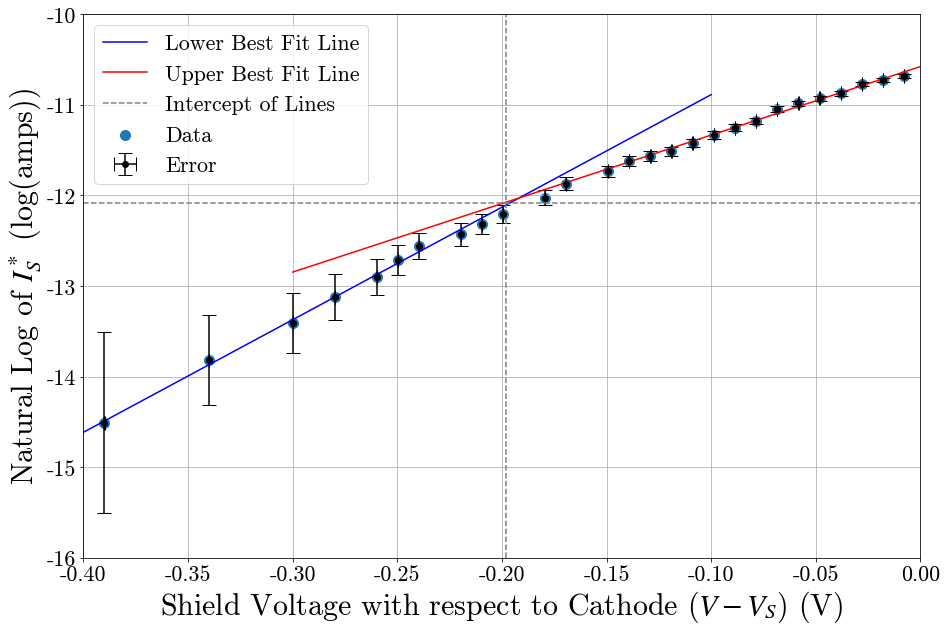

(array([  7.56333357, -10.57747253]), array([12.42179259, -9.64560225]), array([[0.01868757, 0.00165577],
       [0.00165577, 0.00019249]]), array([[0.21640697, 0.06270804],
       [0.06270804, 0.01896835]]))


In [30]:
os.chdir(r'C:/Users/laura/OneDrive/Documents/3rd year/Astro lab/Ramsauer Townsend/images')
def intercept(fit1,fit2):
    xc = (fit2[1]-fit1[1])/(fit1[0]-fit2[0])
    yc = fit1[0]*xc + fit1[1]
    return xc,yc

xi,yi = intercept(fits[0],fits[1])

plt.scatter(xd,np.log(yd), s = 100,label = 'Data')
plt.errorbar(xd,np.log(yd),yerr = ye, xerr =xe,fmt = 'o', capsize = 7, color = 'k',label = 'Error')
plt.ylabel('Natural Log of $I_S^*$ (log(amps))')
plt.xlabel('Shield Voltage with respect to Cathode ($V- V_S$) (V)')
x1 = np.linspace(-0.4,-0.1,100)
x2 = np.linspace(-0.3, 0,100)

plt.plot(x1, func(x1,fit[1][0],fit[1][1]),color = 'blue' , label = 'Lower Best Fit Line')
plt.plot(x2, func(x2,fit[0][0],fit[0][1]),color = 'red', label = 'Upper Best Fit Line')
plt.xlim(-0.4,0)
plt.ylim(-16,-10,0.5)

#plotting intercept
plt.axvline(x=xi,color='grey',linestyle='--',label = 'Intercept of Lines')
plt.axhline(y=yi,color='grey',linestyle='--')

plt.legend(loc = 'upper left')
plt.grid(True)
plt.savefig('correction.png',bbox_inches='tight', dpi = 300)
plt.show()

print(fit)

In [38]:
m1 = unp.uarray(fit[0][0],er_m1)
m2 = unp.uarray(fit[1][0],er_m2)
c1 = unp.uarray(fit[0][1],er_c1)
c2 = unp.uarray(fit[1][1],er_c2)

xc = (c2-c1)/(m1-m2)
yc = m1*xc + c1


print(xc, yc)
print(m1,m2,c1,c2)
Vc = xc


V = 3/(2*m2)
print(V)

-0.192+/-0.034 -12.03+/-0.27
7.56+/-0.14 12.4+/-0.5 -10.577+/-0.014 -9.65+/-0.14
12.4+/-0.5
0.121+/-0.005


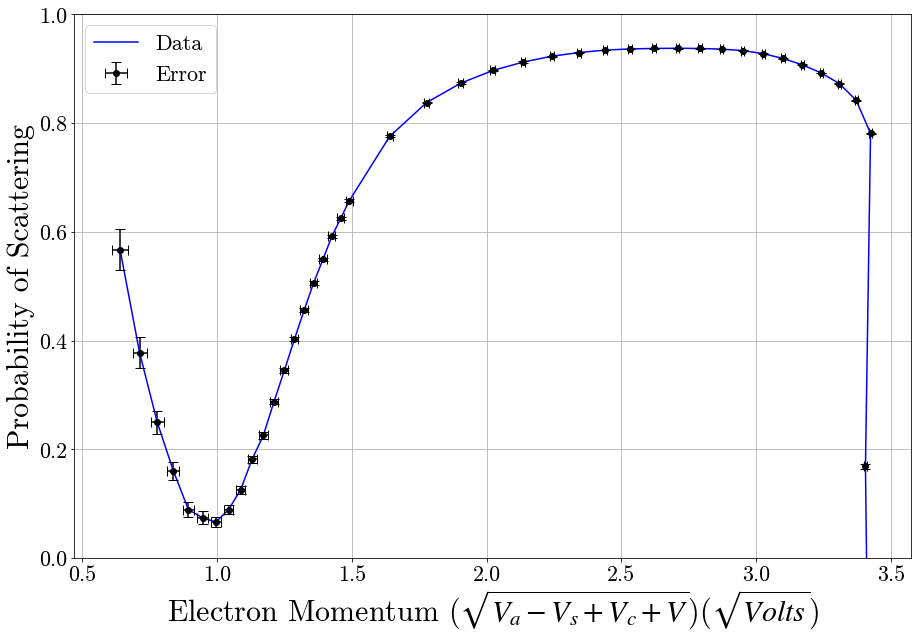

2.791515572302541 0.006619231602064446
-0.11817889939714687


In [49]:
def newmom(va,vs,vc,v):
    return (va - vs + abs(vc) + v)**(0.5)
vs = unp.uarray(V_s,V_se)

newm = newmom(V_a[1:],vs[1:],Vc,V)
xmom = unp.nominal_values(newm)
momer = unp.std_devs(newm)

p = prob(I_p,I_s,I_sF,I_pF)
#intexing since nan given for first val i.e neg in sqrt
plt.plot(xmom,p[1:], color = 'b',label = 'Data')
plt.errorbar(xmom,p[1:],yerr = pe[1:],xerr= momer,fmt = 'o', capsize = 5,color = 'k',label = 'Error')
plt.grid(True)

plt.xlabel("Electron Momentum ($\sqrt{V_a -V_s + V_c +V}$)($\sqrt{Volts}}$)")
plt.ylabel("Probability of Scattering")
plt.ylim(0,1)

plt.legend(loc = 'upper left')
plt.savefig('probabilitycorr.png',bbox_inches='tight', dpi = 300)
plt.show()

#find the min x value (should be within the first 10 points from the graph)
mi = (max(p))
#getting the index of this value
pr = list(p)
i = (pr.index(mi))
#getting corresponding x val by using index number found
print(xmom[i],momer[i])
print(p[20]-p[21])

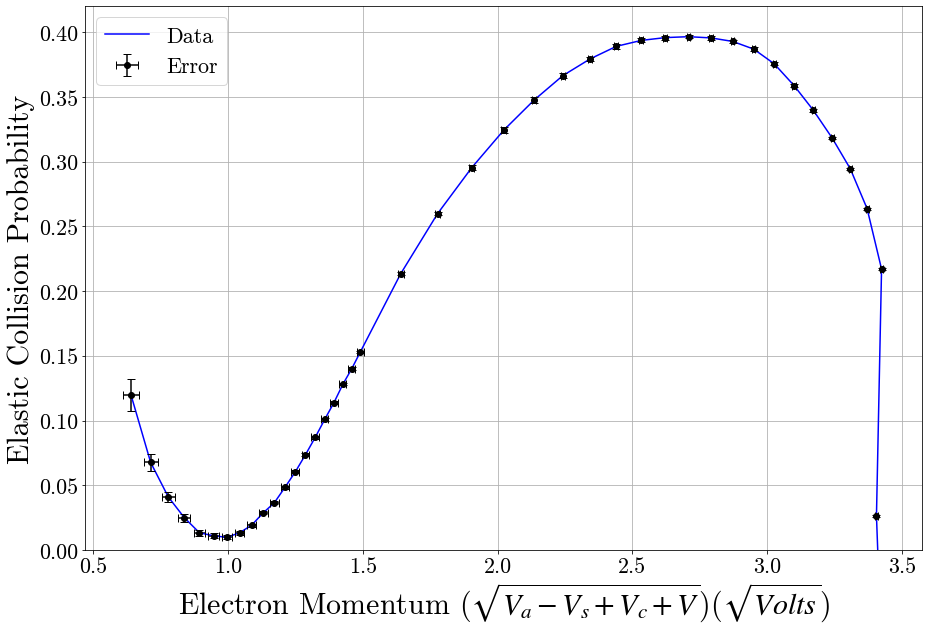

1.0429090038961126 0.01771096284257297


In [46]:
plt.plot(xmom,pec(I_p,I_s,I_pF,I_sF)[1:], color = 'blue',label = 'Data')
plt.errorbar(xmom,pec(I_p,I_s,I_pF,I_sF)[1:],yerr = pece[1:], xerr =momer,fmt = 'o',capsize = 4, color = 'k',label = 'Error')
plt.grid(True)

plt.ylim(0,0.42)
plt.xlabel("Electron Momentum ($\sqrt{V_a -V_s + V_c +V}$)($\sqrt{Volts}}$)")
plt.ylabel("Elastic Collision Probability")
plt.legend(loc = 'upper left')
plt.savefig('peccorr.png',bbox_inches='tight', dpi = 300)

plt.show()


#find the min x value (should be within the first 10 points from the graph)
mi3 = (min(pec(I_p,I_s,I_pF,I_sF)[0:10]))
#getting the index of this value
pr3 = list(pec(I_p,I_s,I_pF,I_sF))
i3 = (pr3.index(mi3))
#getting corresponding x val by using index number found
print(xmom[i3],momer[i3])


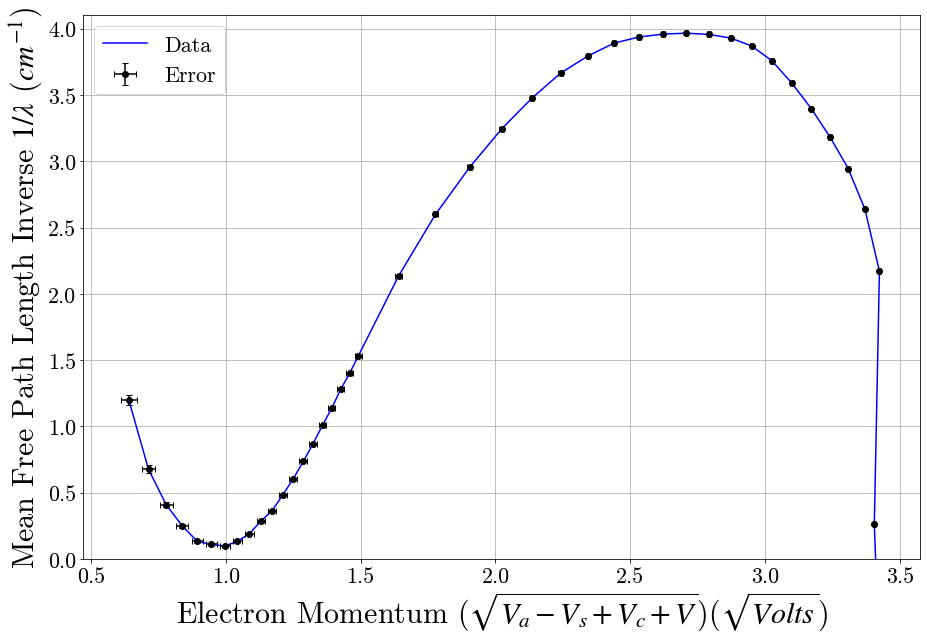

1.0429090038961126 0.01771096284257297


In [43]:
plt.plot(xmom,1/mfp(p[1:]),color = 'b',label = 'Data')
plt.errorbar(xmom,1/mfp(p[1:]),yerr = (pe[1:]), xerr = momer,fmt = 'o',capsize = 3, color = 'k',label = 'Error')
plt.grid(True)
plt.ylim(0,4.1)
plt.xlabel("Electron Momentum ($\sqrt{V_a -V_s + V_c +V}$)($\sqrt{Volts}}$)")
plt.ylabel("Mean Free Path Length Inverse $1/\lambda$ ($cm^{-1}$)")
plt.legend(loc = 'upper left')
plt.savefig('mfpcorr.png',bbox_inches='tight', dpi = 300)

plt.show()


#find the min x value (should be within the first 10 points from the graph)
mi2 = (min(1/mfp(p)[0:10]))
#getting the index of this value
pr2 = list(1/mfp(p))
i2 = (pr2.index(mi2))
#getting corresponding x val by using index number found
print(xmom[i2],momer[i2])



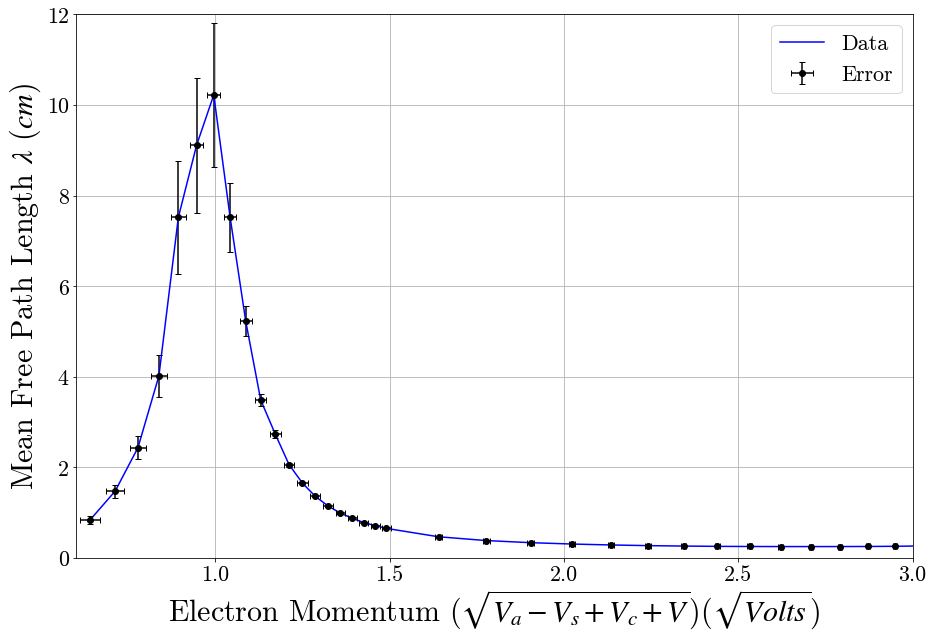

10.2+/-1.6


In [53]:
pen = unp.std_devs((-0.7/unp.log(1-t)))
plt.plot(xmom,mfp(p[1:]),color = 'b',label = 'Data')
plt.errorbar(xmom,mfp(p[1:]),yerr = (pen[1:]), xerr = momer,fmt = 'o',capsize = 3, color = 'k',label = 'Error')
plt.grid(True)
plt.xlabel("Electron Momentum ($\sqrt{V_a -V_s + V_c +V}$)($\sqrt{Volts}}$)")
plt.ylabel("Mean Free Path Length $\lambda$ ($cm$)")
plt.xlim(0.6,3)
plt.ylim(0,12)
plt.legend(loc = 'upper right')
plt.savefig('mfpcorr2.png',bbox_inches='tight', dpi = 300)
plt.show()
print(max(-0.7/unp.log(1-t)))